In [9]:
import json
from utils import (
    get_latest_experiments,
    aggregate_metrics,
    plot_all_metrics,
    plot_class_performances,
    plot_metric_comparison,
    permutation_test,
    plot_permutation_test_distribution,
    plot_permutation_anova_distribution,
    permutation_anova ,  
    METRIC_FILES
)

BASE_DIR = "../local_experiments"

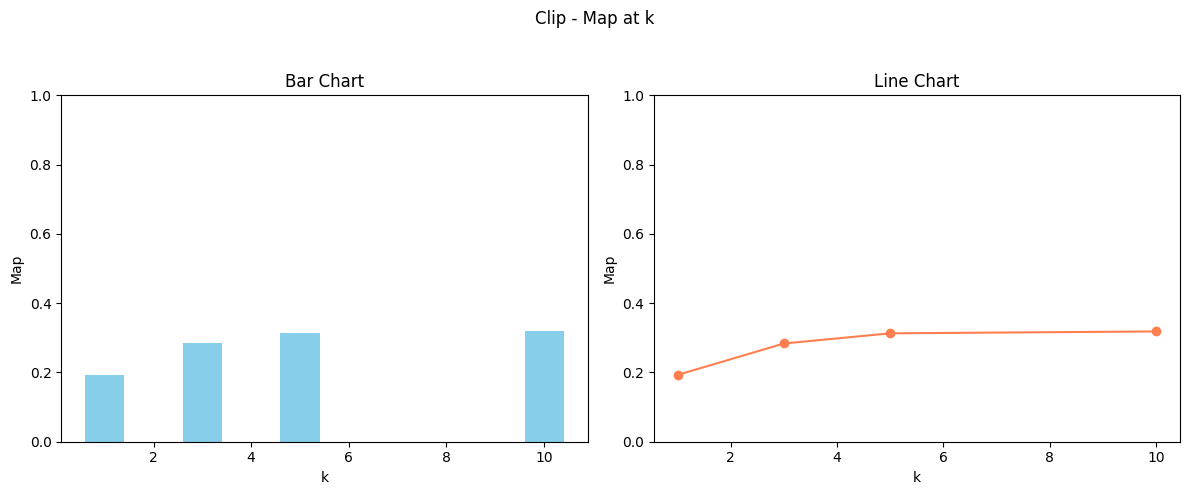

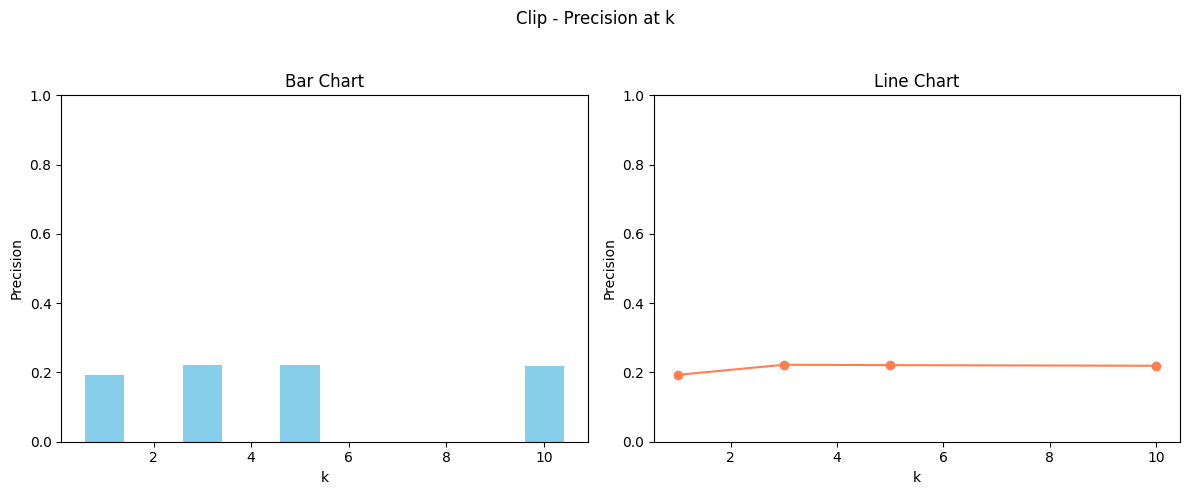

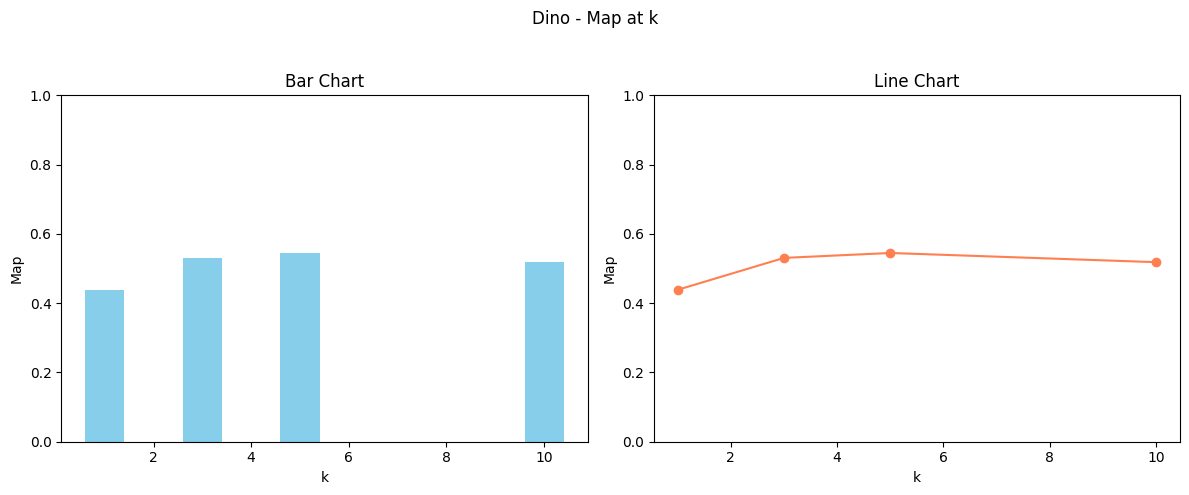

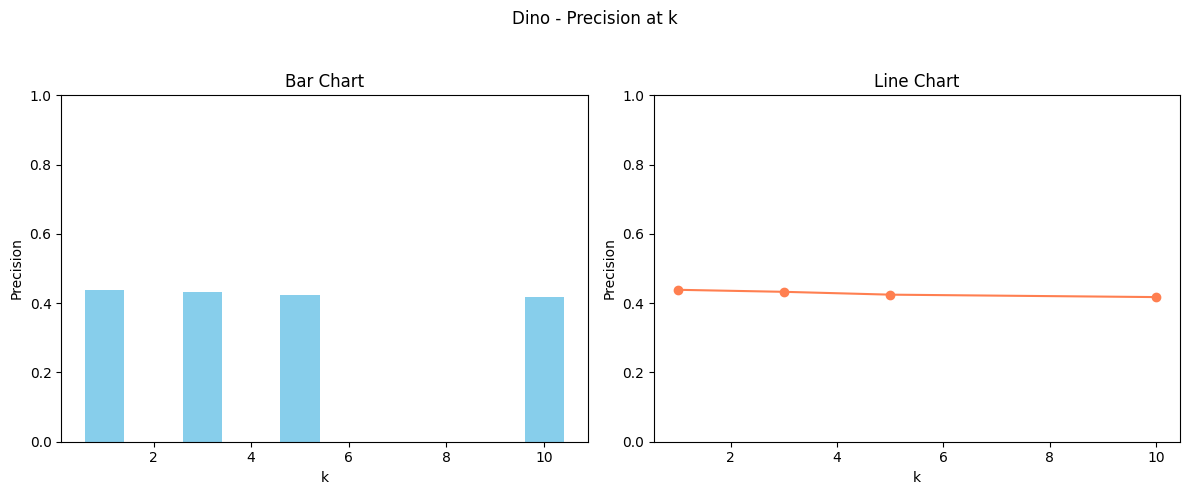

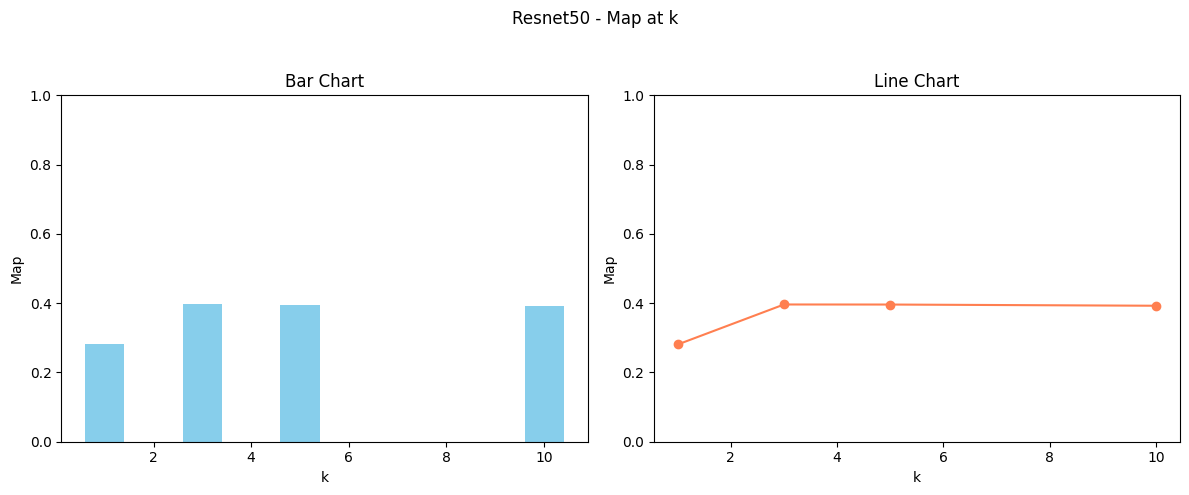

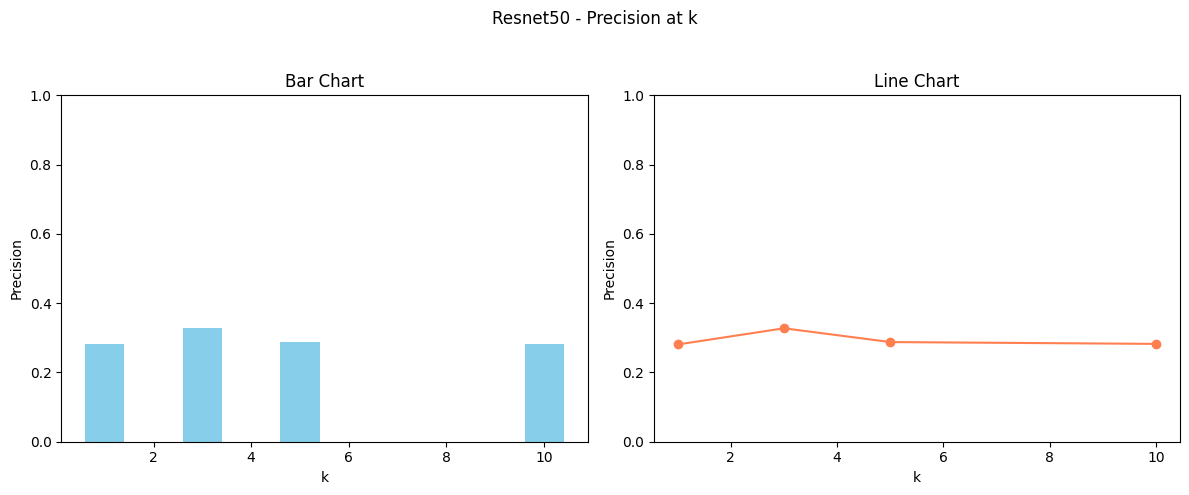

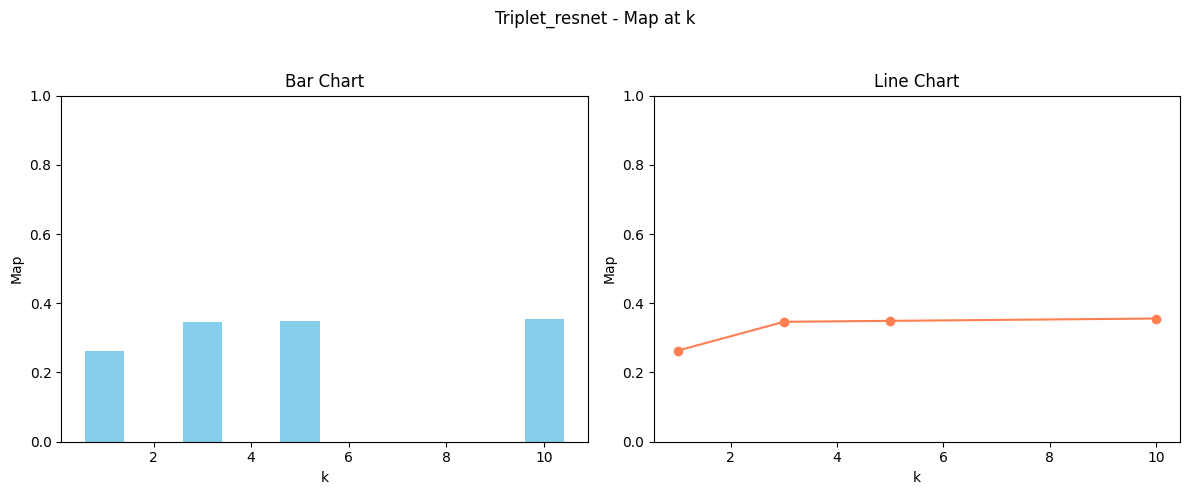

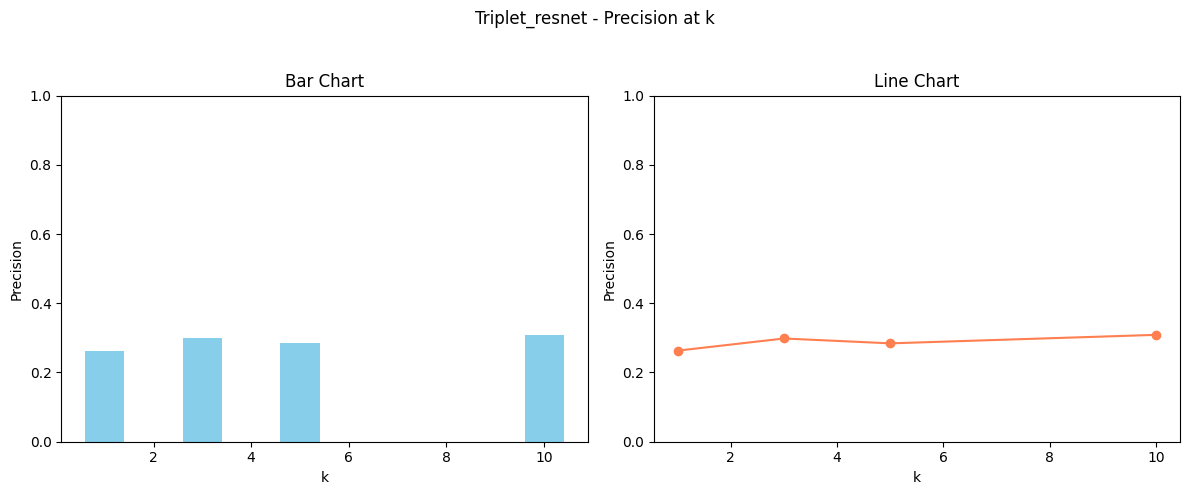

File not found: ../local_experiments/triplet_vit_2025-04-13_22-04-42/map_at_k_results.json
File not found: ../local_experiments/triplet_vit_2025-04-13_22-04-42/precision_at_k_results.json


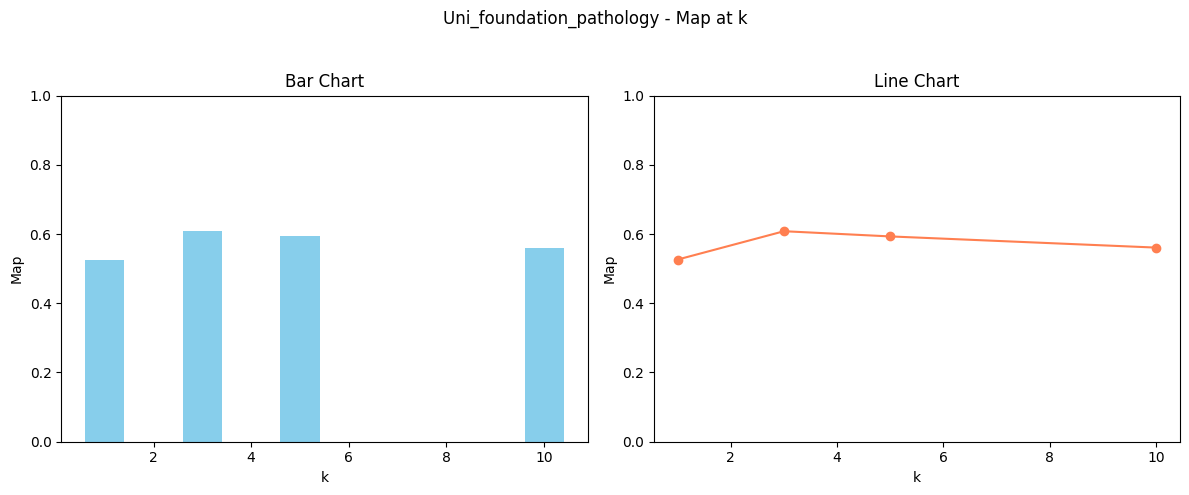

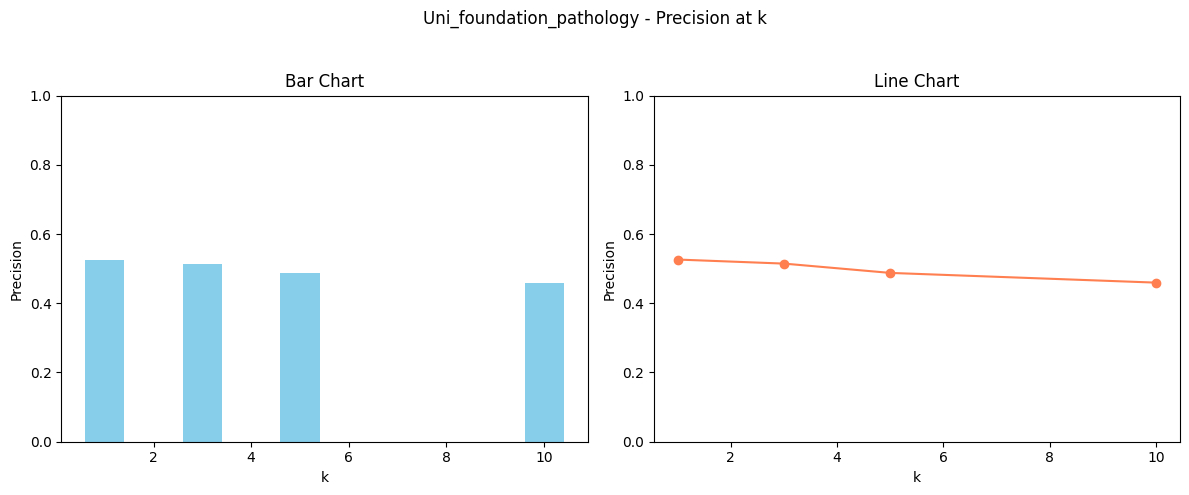

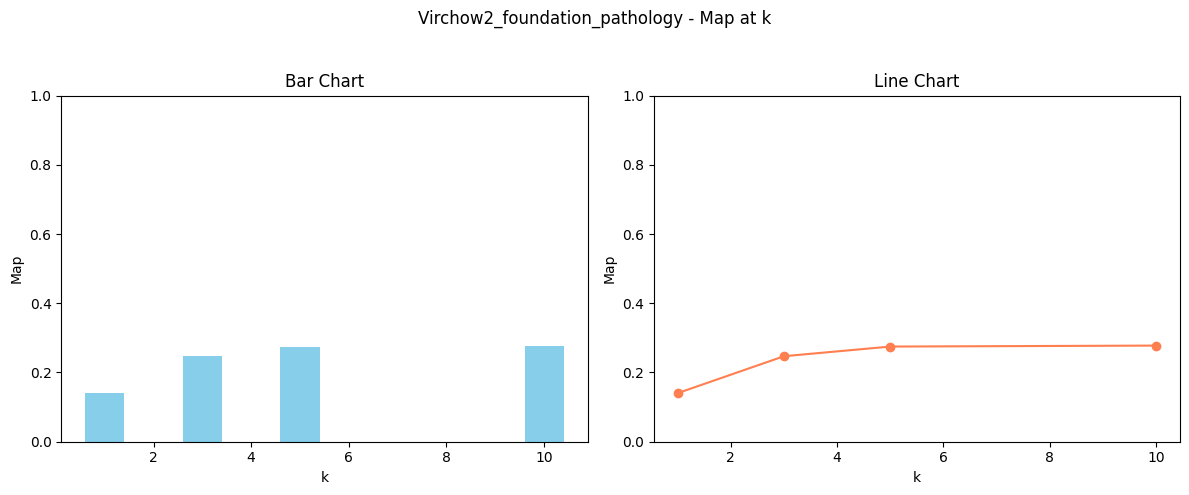

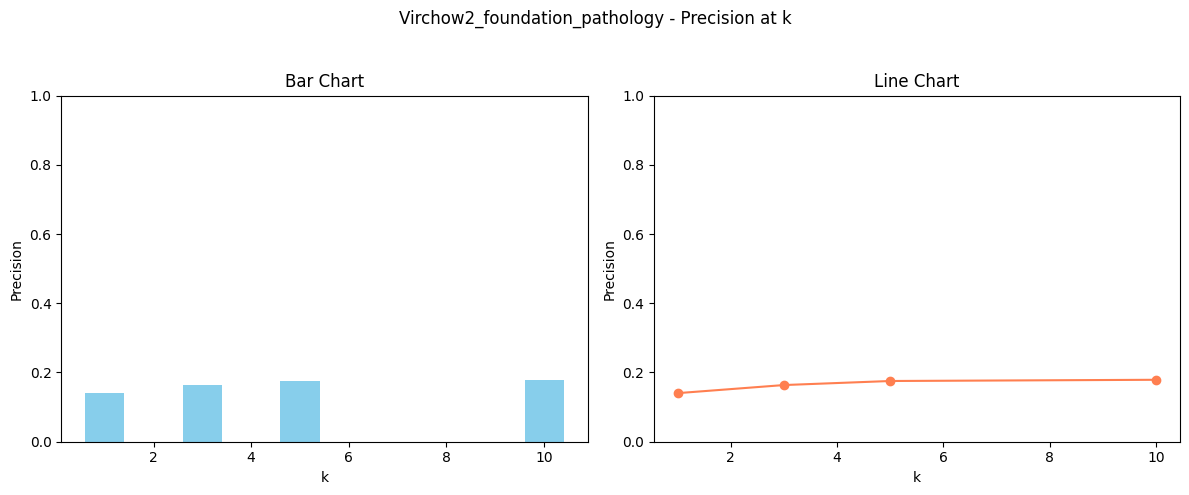

File not found: ../local_experiments/vit_2025-04-12_06-46-15/precision_at_k_results.json


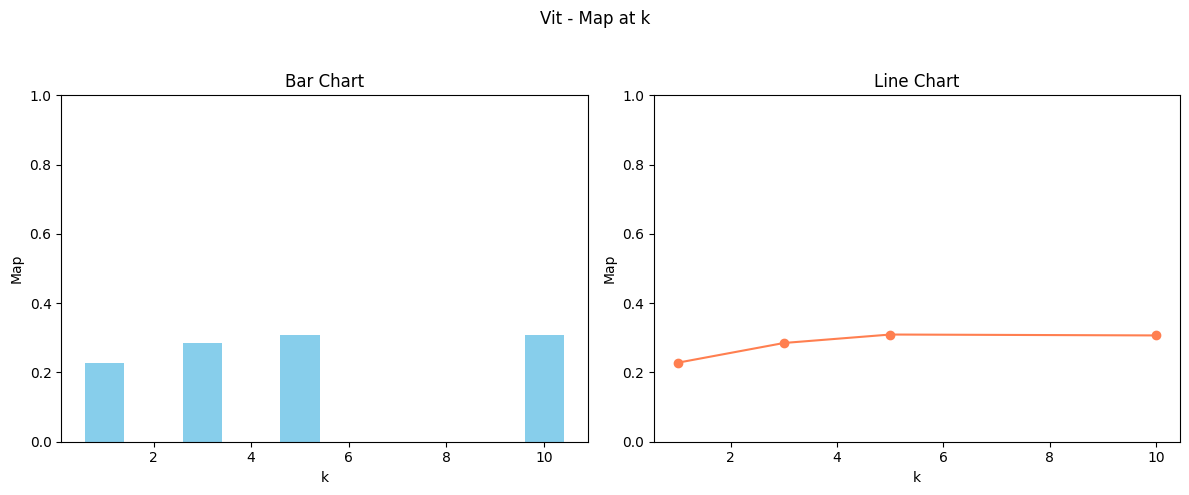

In [10]:
# Specify a list of experiment folder names.
# Example usage:
#   - specific_experiments = []             -> process the latest experiment for each type.
#   - specific_experiments = ["exp1_folder"]  -> process only that experiment.
#   - specific_experiments = ["exp1_folder", "exp2_folder"] -> process multiple experiments.
specific_experiments = ['uni_foundation_pathology_2025-04-12_06-52-38']  # Change as needed; empty list means "use latest per experiment type"
specific_experiments = []  # Change as needed; empty list means "use latest per experiment type"

# Retrieve the experiments based on the provided filter.
latest_experiments = get_latest_experiments(BASE_DIR, specific_experiments)

if not latest_experiments:
    print("No experiments found.")
else:
    # Iterate over each experiment type and process.
    for exp_type, exp_info in latest_experiments.items():
        # Aggregate the compiled metrics from the experiment folder.
        aggregated = aggregate_metrics(exp_info["path"])
        # Plot all available metrics (accuracy, recall, map, precision)
        plot_all_metrics(aggregated, exp_type)


File not found: ../local_experiments/triplet_vit_2025-04-13_22-04-42/map_at_k_results.json


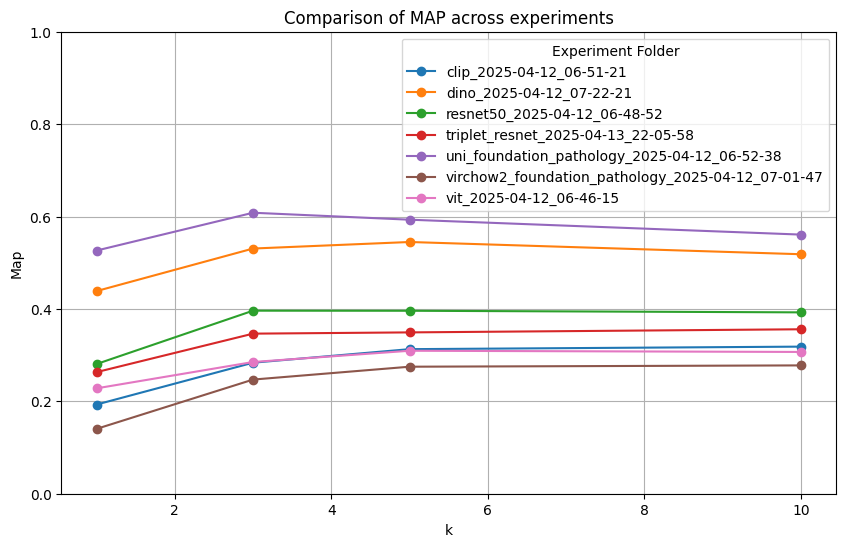

In [11]:
plot_metric_comparison("map", latest_experiments)

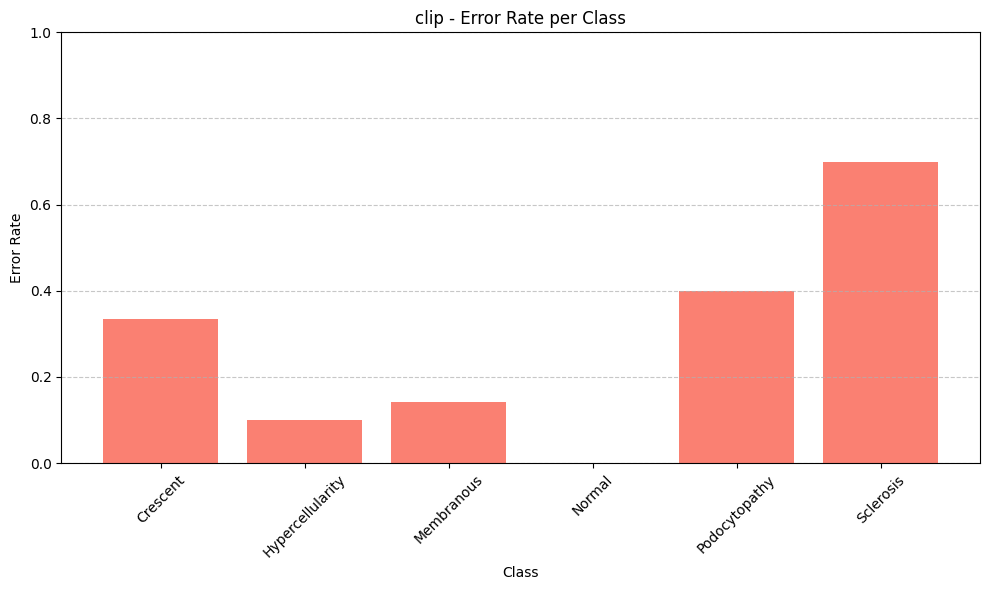

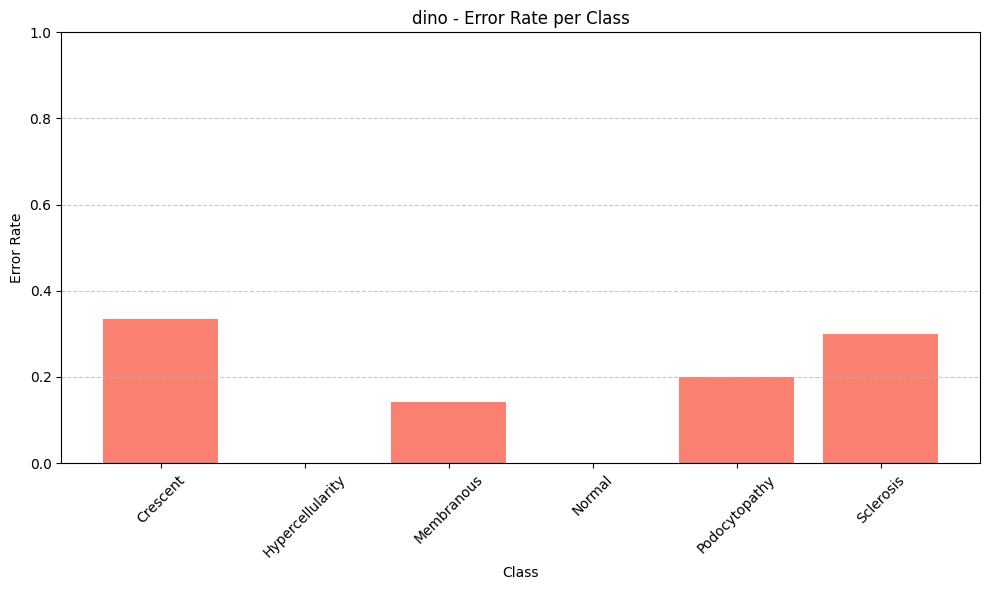

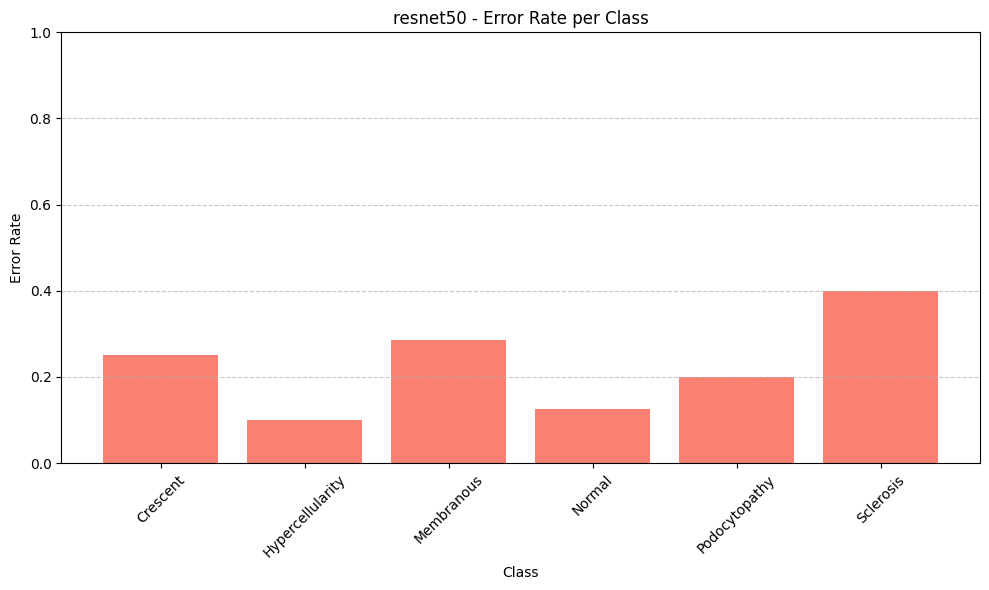

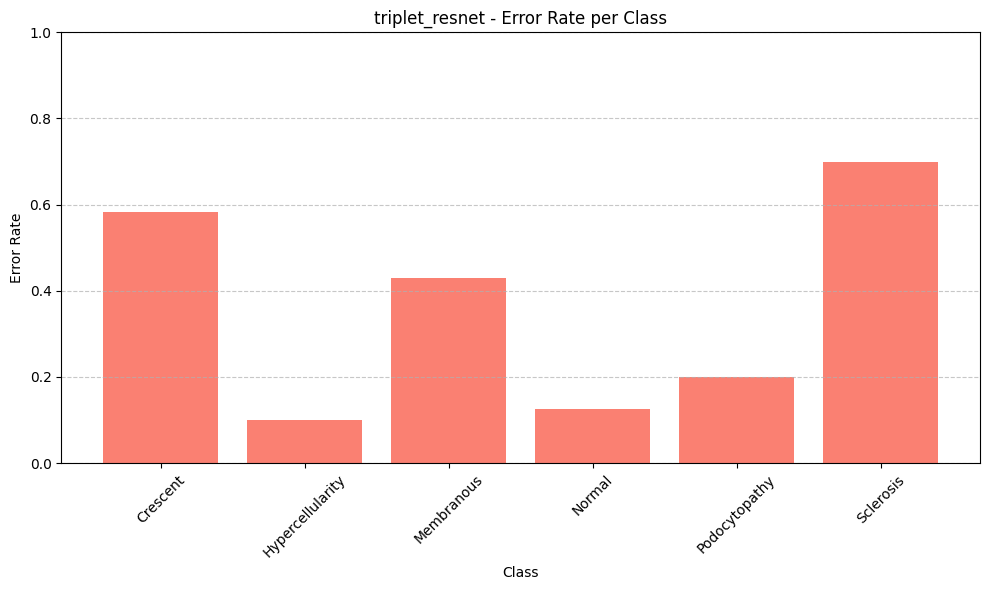

File not found: ../local_experiments/triplet_vit_2025-04-13_22-04-42/map_at_k_query_details.json
No class statistics to plot.


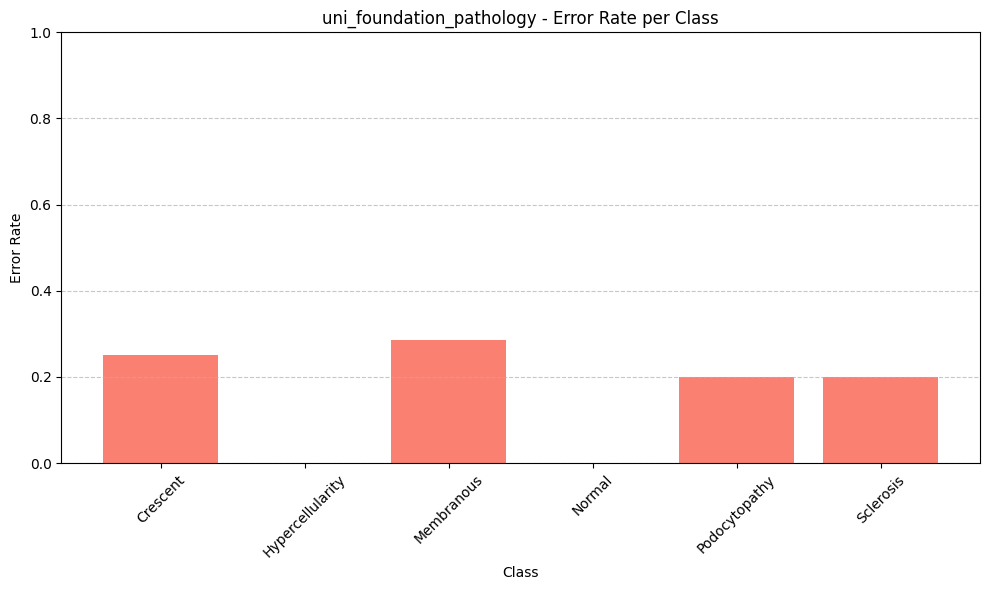

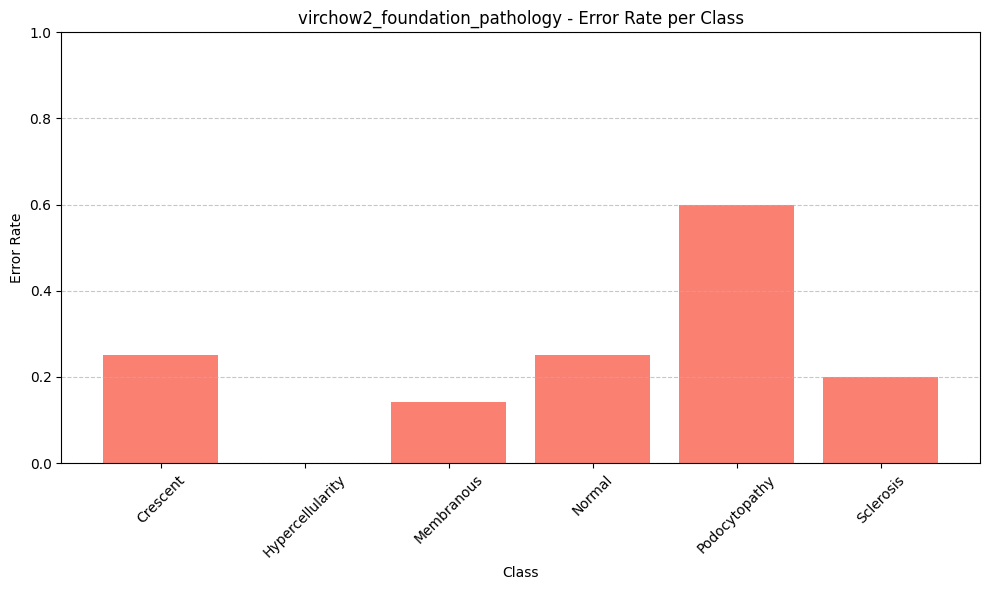

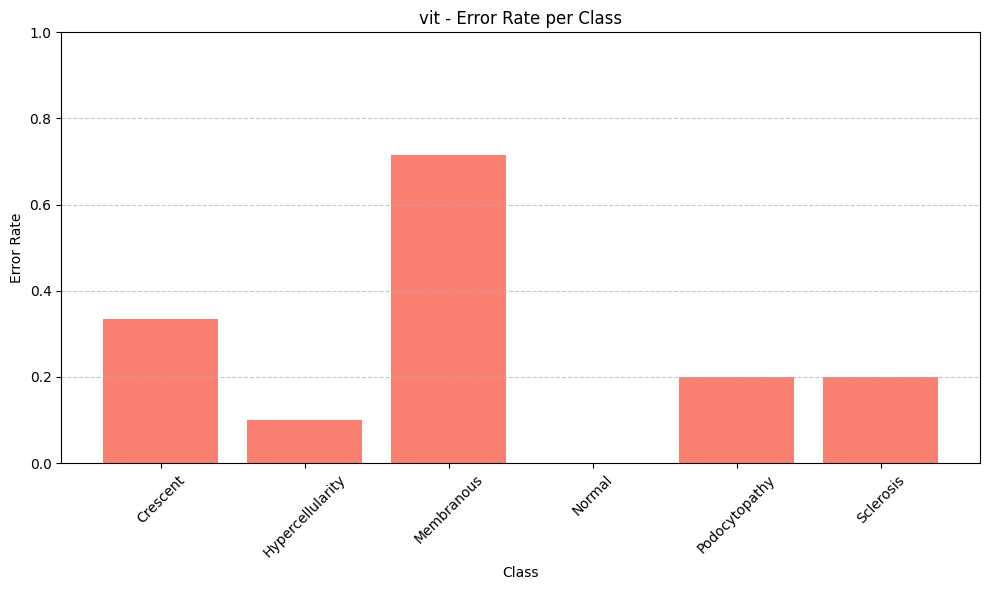

In [12]:
plot_class_performances(latest_experiments)

In [13]:


with open("../local_experiments/uni_foundation_pathology_2025-04-12_06-52-38/map_at_k_query_details.json", "r") as f:
    model1 = json.load(f)

with open("../local_experiments/dino_2025-04-12_07-22-21/map_at_k_query_details.json", "r") as f:
    model2 = json.load(f)
    
with open("../local_experiments/clip_2025-04-12_06-51-21/map_at_k_query_details.json", "r") as f:
    model3 = json.load(f)
    
with open("../local_experiments/resnet50_2025-04-12_06-48-52/map_at_k_query_details.json", "r") as f:
    model4 = json.load(f)

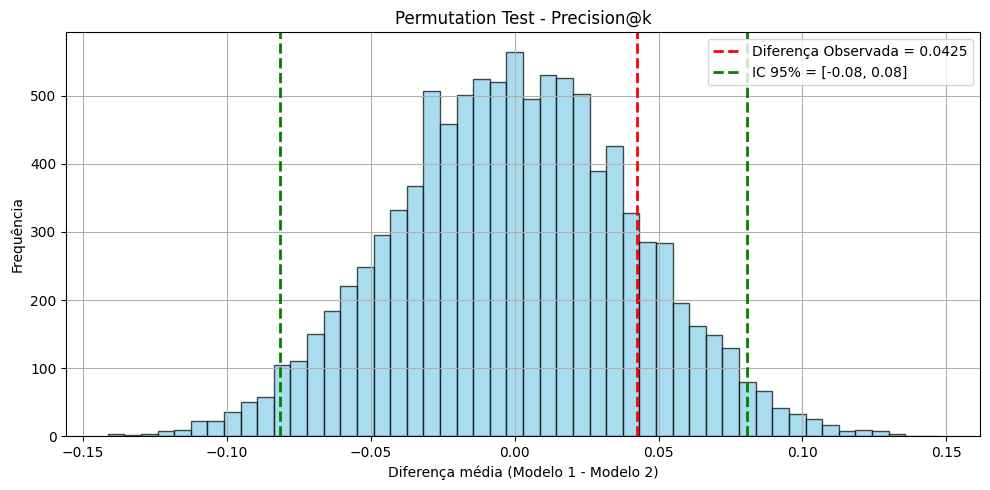

In [14]:
result = permutation_test(model1, model2, 95)
plot_permutation_test_distribution(result)

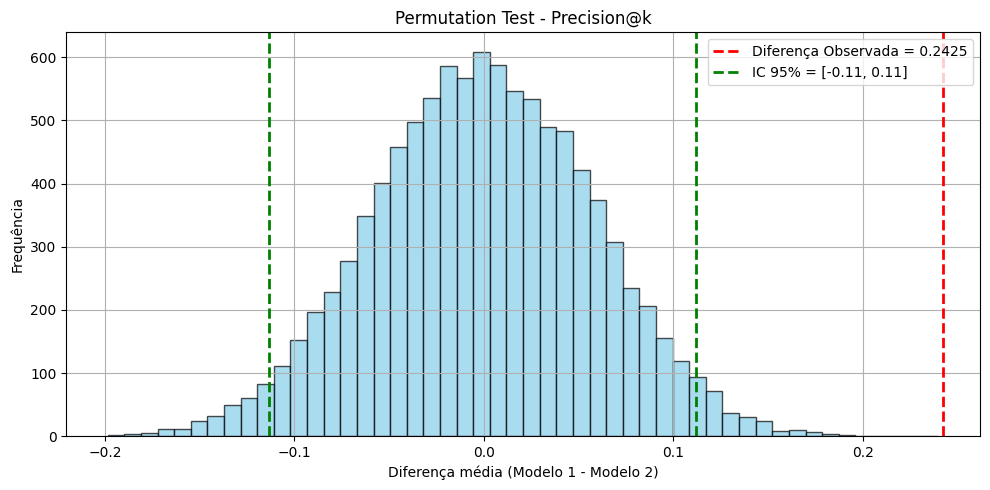

In [15]:
result = permutation_test(model1, model3, 95)
plot_permutation_test_distribution(result)

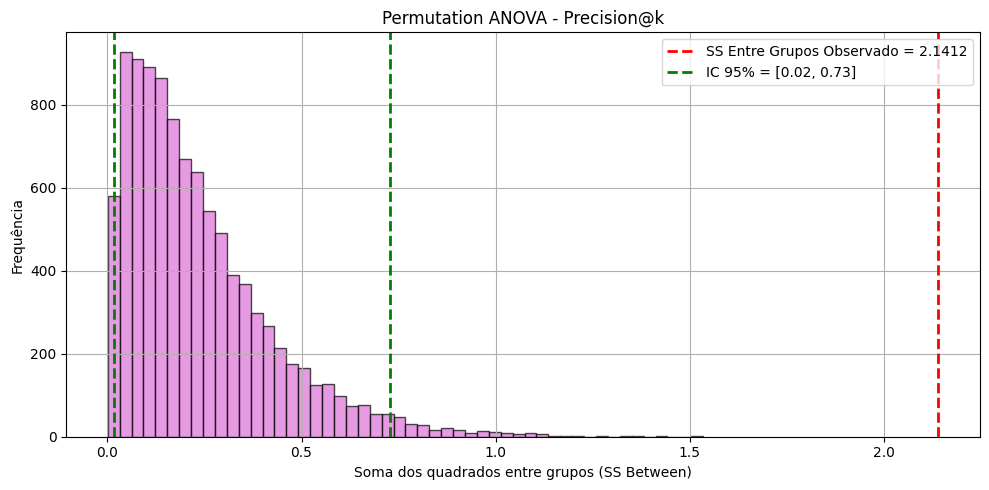

In [16]:
res = permutation_anova([model1, model2, model3, model4], n_permutations=10000, seed=42, confidence=95)
plot_permutation_anova_distribution(res)